# ATP viability and inflection points

In [1]:
import numpy as np
import scipy.optimize as optim
import math
import os,sys
import pandas as pd
import copy
import scipy.stats as st
from scipy.stats import t
import matplotlib.pyplot as plt
from matplotlib import rcParams
import random as rand

import matplotlib.colors as mcolors

In [2]:
def linear(x,a,b):
    return (a*x + b)

**Read viability and T2 inflection points**

In [3]:
cwd = os.getcwd()
data_directory = './data/ATP'
os.chdir(data_directory)

atp_T2 = pd.read_csv('atp_viability_day1-set1.csv')

In [4]:
atp_keys = ['9-10','11-13','12-14']

atps, t2s = {}, {}

for k in atp_keys:
    k1 = 'ATP' + k
    k2 = 'AODAPI' + k
    
    atps[k] = []
    t2s[k] = []
    
    max_ATP = max(atp_T2[k1])
    min_ATP = min(atp_T2[k1])
    
    for v1,v2 in zip(atp_T2[k1],atp_T2[k2]):
        if np.isnan(v1)==False:
            atps[k].append(v1)
            
            t2s[k].append(85.77*((v2/100)**(-1.7)))

**Fit $\log[\mathrm{ATP}]$-vs-T2.**

In [5]:
r2s = {}

for k in atp_keys:
    results = st.linregress(atps[k],t2s[k])
    
    r2s[k] = str(round(results.rvalue**2,3))

In [6]:
for k in atp_keys:
    popt, pcov = optim.curve_fit(linear,atps[k],t2s[k])

Text(0.5, 1.0, '24 h')

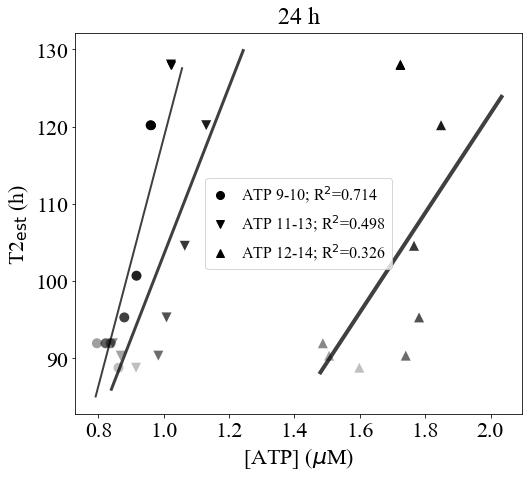

In [7]:
all_markers = ["o","v","^"]

lws = [2,3,4]

fig, axs = plt.subplots(figsize=(8,7))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

selected_colors = []

mi = 0

for k in atp_keys:
    labelname = k.replace('Study','ATP-')
    
    alpha_s = np.linspace(0.25,1,len(atps[k]))
    
    plt.scatter(atps[k],t2s[k],marker=all_markers[mi],s=100,alpha=alpha_s,linewidth=0,color='black')
    
    popt, pcov = optim.curve_fit(linear,atps[k],t2s[k])
    
    atp_range = np.linspace(0.995*np.min(atps[k]),1.1*np.max(atps[k]),100)
    
    t2_range = linear(atp_range,popt[0],popt[1])
    
    plt.plot(atp_range,t2_range,lw=lws[mi],alpha=0.75,color='black')
    
    plt.plot(atps[k][-1],t2s[k][-1],ms=8,lw=0,marker=all_markers[mi],color='black',label='ATP '+labelname+'; R$^2$='+r2s[k])
    
    mi += 1

plt.xticks(size=22)
plt.yticks(size=22)  

plt.xlabel(r'[ATP] ($\mu$M)',size=22)
plt.ylabel(r'T2$_{\mathrm{est}}$ (h)',size=22,rotation=90)
plt.legend(frameon=True,prop={'size': 16,'family':'Times New Roman'},markerscale=1.0,handlelength=1.0,loc='best')
plt.title('24 h',size=24,pad=10)